In [1]:
import os
import sys
import numpy as np
import pylab as pl
import astropy.units as u
import matplotlib.pyplot as plt

from   astropy.table import Table

In [2]:
sys.path.append('{}/DESI/'.format(os.environ['HOME']))

In [3]:
import pubplot

In [4]:
user = os.environ['USER']

gama = Table.read('/cosma/home/durham/{}/data/GAMA4/gama_gold.fits'.format(user))
gama

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64
32174,587722981741691177,183.70037809,-1.05288215,19.736502,0.08332,4,G12_Y2_043_160,5,21.557545,20.126371,19.787603,19.484722,19.264608,266.27475872158834,37.12664999915889,G12,-245.24125652386456,-15.860665751468476,-4.516540592019583
144355,587724650867524042,179.66102327,-1.40728884,19.757875,0.25293,4,G12_Y2_044_206,5,21.755758,20.432243,19.696829,19.460794,19.193336,902.3148855942798,39.77679061016829,G12,-719.9340667453704,4.25936683630219,-17.686760009292964
124541,587724649256976626,179.89751219,-2.57730755,18.748053,0.15081,4,G12_Y5_027_201,6,21.232367,19.656624,18.665045,18.255375,17.882515,505.0130530866764,38.51651301742749,G12,-438.3880940653836,0.784167420215807,-19.73313642858396
118797,587724648722006137,184.17555062,-2.99648752,18.028751,0.11158,4,G12_Y6_043_164,6,20.562859,18.805058,17.933498,17.555489,17.241117,363.8204262003115,37.804435391408795,G12,-325.9851692787255,-23.79900353827768,-17.10953455603715
39636,587722982275940549,177.66111022,-0.65931048,19.175905,0.14049,4,G12_Y2_019_297,6,22.140453,20.212257,19.111605,18.726572,18.40837,467.2312176782153,38.34765926055226,G12,-409.30744566436306,16.7177603718603,-4.714092626245793
341716,587726032799858903,212.96405368,2.36821727,18.925417,0.25699,4,G15_Y6_105_385,6,21.217352,20.138872,18.947233,18.411552,18.151215,918.9550785270128,39.8164714109857,G15,-612.8576499598569,-397.4479849236432,30.20909526144918
346622,587726033302389048,134.55743422,2.16600461,18.550014,0.1138,4,G09_Y1_DX1_144,6,20.010414,19.038668,18.566885,18.253822,18.143185,371.63282964275743,37.85057036060853,G9,-233.93801379220335,237.5802013794907,12.61072730288422
177971,587725041165008988,178.47535786,-1.9391443,17.961697,0.13387,4,G12_Y1_DS2_127,6,20.773668,18.907188,17.858261,17.391043,17.011896,443.233640809137,38.233163576554496,G12,-390.5412315651098,10.394765640398004,-13.227386098654884


In [5]:
desi = Table.read('{}/data/GAMA4/desi_gold.fits'.format(os.environ['HOME']))
desi

TARGETID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKID,BRICK_OBJID,MORPHTYPE,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MASKBITS,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,BRICKNAME,EBV,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,ROS,ROS_DIST,GAMA_FIELD,CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,GAMA_SEP
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,,,,,,arcsec
int64,float64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,int16,int64,bytes2,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,int64,float64,bytes4,int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float64
39627745453408978,9603.339628566056,2018.294518277414 .. 138.09383776316818,0.08720044682704724,2.0114745865077496e-05,0,7878,GALAXY,--,10,1594.6913420383353,0,179.03856821038173,-1.6330908909643844,0.0,0.0,2015.5,5764607523034234880,1,TGT,0.9067837874882217,575,9010,321004,722,SER,64.94377,139.7179,241.27975,54.019768,26.14991,9.291106,0,3602241439693010944,G2,19.32209,18.749277,17.380249,0.0,1791m017,0.026247581,182.67763,127.54936,0.87935585,0.26966718,14.624748,31.463203,54.33401,14.624881,31.46335,54.334084,5.0892467,2.3098664,-0.122994184,-0.022228142,S,102100,9,5764607523034234880,131074,0,79164837199872,0,0,0,179.03856821038173,-1.6330908909643844,1,442.1598,1,1,0.002,0.002,0.006,0.006,179.03857661555878,0.0,-1.6331130438817947,0.0,0.71982473,1,1.7268775719768001,G12,185088,587725041702076597,179.03857839,-1.63308943,17.340437,0.08715,5,371706163328215040,6,19.55327,17.981966,17.22529,16.837662,16.547691,279.28619758761715,37.23024736630215,G12,256.7043618156044,-6.465302621376653,-7.5787023791726975,0.03700738404518863
39627751484818657,8292.481479899026,702.2569386994785 .. -19.81480319213203,0.16695365525817663,7.785652952943638e-05,0,7870,GALAXY,--,10,104.82783576194197,0,178.55969144029038,-1.3892300444133558,0.0,0.0,2015.5,1152921504606846976,1,TGT,0.6695692747287785,516,9010,322442,1249,REX,6.362388,17.557882,33.563087,311.37558,114.28901,19.072247,0,3602309570758140544,G2,20.545284,20.337368,18.703327,0.0,1786m015,0.023079034,31.97689,22.125416,2.4041193,0.5788827,4.046993,11.168232,21.348835,4.046993,11.168232,21.348835,1.0,0.31920266,0.0,0.0,S,102100,9,1152921504606846976,131074,0,0,0,0,0,178.55969144029038,-1.3892300444133558,1,306.1762,1,1,0.001,0.001,0.001,0.001,178.559695421442,0.0,-1.389233925725511,0.0,0.778823,1,1.735508547828506,G12,700793,587724650866999466,178.55969636,-1.3892338,19.410374,0.16733,4,G12_Y3_006_178,4,22.600788,20.474333,19.393015,18.982697,18.581863,566.4253081598428,38.76571324802559,G12,484.8040557059769,-1

In [6]:
desi['GAMA_FIELD'].data

array([b'G12', b'G12', b'G12', ..., b'G12', b'G12', b'G12'], dtype='|S4')

In [7]:
# read in for metadata
# gama_G9 = Table.read('/cosma/home/durham/{}/data/GAMA4/gama_gold_G9_ddp_n8_d0_0.fits'.format(user))

Text(0, 0.5, 'N')

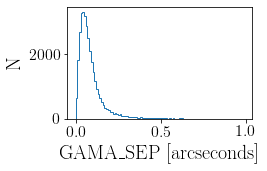

In [8]:
plt.hist(desi['GAMA_SEP'].data, histtype='step', bins=np.arange(0., 1., 1.e-2))

plt.xlabel('GAMA_SEP [arcseconds]')
plt.ylabel('N')

In [9]:
good_match = desi['GAMA_SEP'] < .6 * u.arcsec

print('Good match fraction: {:.4f}[%]'.format(100. * np.mean(good_match)))

Good match fraction: 71.7459[%]


In [10]:
match = desi[good_match]
match

TARGETID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKID,BRICK_OBJID,MORPHTYPE,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MASKBITS,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,BRICKNAME,EBV,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,ROS,ROS_DIST,GAMA_FIELD,CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,GAMA_SEP
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,,,,,,arcsec
int64,float64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,int16,int64,bytes2,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,int64,float64,bytes4,int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float64
39627745453408978,9603.339628566056,2018.294518277414 .. 138.09383776316818,0.08720044682704724,2.0114745865077496e-05,0,7878,GALAXY,--,10,1594.6913420383353,0,179.03856821038173,-1.6330908909643844,0.0,0.0,2015.5,5764607523034234880,1,TGT,0.9067837874882217,575,9010,321004,722,SER,64.94377,139.7179,241.27975,54.019768,26.14991,9.291106,0,3602241439693010944,G2,19.32209,18.749277,17.380249,0.0,1791m017,0.026247581,182.67763,127.54936,0.87935585,0.26966718,14.624748,31.463203,54.33401,14.624881,31.46335,54.334084,5.0892467,2.3098664,-0.122994184,-0.022228142,S,102100,9,5764607523034234880,131074,0,79164837199872,0,0,0,179.03856821038173,-1.6330908909643844,1,442.1598,1,1,0.002,0.002,0.006,0.006,179.03857661555878,0.0,-1.6331130438817947,0.0,0.71982473,1,1.7268775719768001,G12,185088,587725041702076597,179.03857839,-1.63308943,17.340437,0.08715,5,371706163328215040,6,19.55327,17.981966,17.22529,16.837662,16.547691,279.28619758761715,37.23024736630215,G12,256.7043618156044,-6.465302621376653,-7.5787023791726975,0.03700738404518863
39627751484818657,8292.481479899026,702.2569386994785 .. -19.81480319213203,0.16695365525817663,7.785652952943638e-05,0,7870,GALAXY,--,10,104.82783576194197,0,178.55969144029038,-1.3892300444133558,0.0,0.0,2015.5,1152921504606846976,1,TGT,0.6695692747287785,516,9010,322442,1249,REX,6.362388,17.557882,33.563087,311.37558,114.28901,19.072247,0,3602309570758140544,G2,20.545284,20.337368,18.703327,0.0,1786m015,0.023079034,31.97689,22.125416,2.4041193,0.5788827,4.046993,11.168232,21.348835,4.046993,11.168232,21.348835,1.0,0.31920266,0.0,0.0,S,102100,9,1152921504606846976,131074,0,0,0,0,0,178.55969144029038,-1.3892300444133558,1,306.1762,1,1,0.001,0.001,0.001,0.001,178.559695421442,0.0,-1.389233925725511,0.0,0.778823,1,1.735508547828506,G12,700793,587724650866999466,178.55969636,-1.3892338,19.410374,0.16733,4,G12_Y3_006_178,4,22.600788,20.474333,19.393015,18.982697,18.581863,566.4253081598428,38.76571324802559,G12,484.8040557059769,-1

Text(0, 0.5, 'Declination [deg.]')

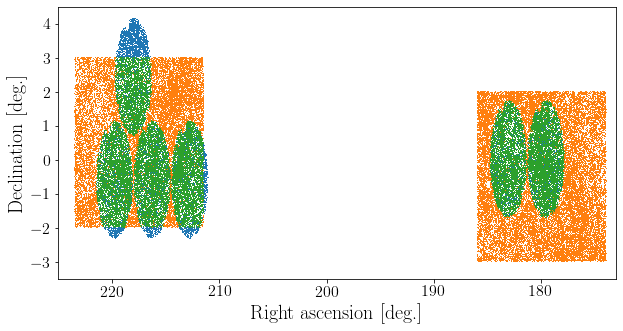

In [11]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

pl.plot(desi['TARGET_RA'],   desi['TARGET_DEC'], marker=',', lw=0.0)
pl.plot(gama['RA'],   gama['DEC'], marker=',', lw=0.0)
pl.plot(match['RA'], match['DEC'], marker=',', lw=0.0)

pl.xlim(225., 173.)
pl.ylim(-3.5,  4.5)

pl.xlabel('Right ascension [deg.]')
pl.ylabel('Declination [deg.]')

In [12]:
print(len(gama), len(desi), len(match))

113687 46273 33199


In [13]:
def zcomp(match, xcol='Z', ycol='ZGAMA', xlabel=r'$z_{\rm DESI}$', ylabel=r'$z_{\rm GAMA}$'):
    fig, ax = plt.subplots(2, 1,\
                           figsize=(5, 8),\
                           sharex=True,\
                           gridspec_kw = {'height_ratios': [2, 1],\
                                          'hspace':0.05})

    ax[0].scatter(match[xcol], match[ycol], s=0.15)

    ax[0].axes.get_xaxis().set_visible(False)
    
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)
    
    ax[0].set_xlim(-0.05, 0.3)
    ax[0].set_ylim(-0.05, 0.3)

    ax[1].scatter(match[xcol], (match[ycol] - match[xcol]) / (1. + match[xcol]), s=0.15)
    
    ax[1].set_xlim(-0.05, 0.3)
    ax[1].set_ylim(-0.003, 0.003)
    
    ax[1].set_xlabel(xlabel)
    ax[1].set_ylabel(r'$\Delta z \ / \ (1 + z_{\rm DESI}) $')

    ax[1].axhline(y = 0.001, color = 'k', linewidth=.5)
    ax[1].axhline(y = -0.001, color = 'k', linewidth=.5)

    ax[0].legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


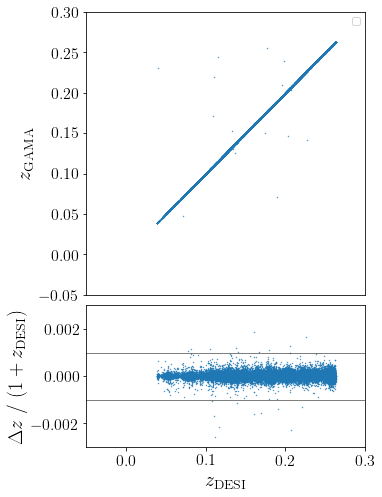

In [14]:
zcomp(match)

In [15]:
thres    = 1000. # km/s

z_ratio  = np.abs(match['ZGAMA'] - match['Z']) / (1. + match['ZGAMA'])
cat_frac = np.mean(z_ratio > (thres / 2.9979e5))

print('For {} km/s, catastrophic failures are: {:.4f} [%]'.format(thres, 100. * cat_frac))

For 1000.0 km/s, catastrophic failures are: 0.0422 [%]


# Done.